In [8]:
# Import modules

import numpy as np  # Numerical Python package
import matplotlib.pyplot as plt # Python plotting package
# Import
import response_spectrum as rsp # Response Spectra tools
import intensity_measures as ims # Intensity Measure Tools

from sm_utils import (get_velocity_displacement,
                           get_time_vector,
                           convert_accel_units,
                           _save_image,
                           nextpow2)
import linecache

from scipy.integrate import cumtrapz

periods = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,
                    0.20, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.38, 0.40, 0.42, 0.44, 0.46, 0.48, 0.5, 
                    0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 
                    1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.5, 6.0, 
                    6.5, 7.0,7.5, 8.0, 8.5, 9.0, 9.5, 10.0], dtype=float)
number_periods = len(periods)

In [3]:
import os  
def GetFileList(FindPath,sufx,FlagStr=[]):  
    FileList=[]  
    FileNames=os.listdir(FindPath)  
    if (len(FileNames)>0):  
       for fn in FileNames:
        if os.path.splitext(fn)[1] == sufx:  
           if (len(FlagStr)>0):  
               if (IsSubString(FlagStr,fn)):  
                   fullfilename=os.path.join(FindPath,fn)  
                   FileList.append(fullfilename)  
           else:   
               fullfilename=os.path.join(FindPath,fn)  
               FileList.append(fullfilename)           
    return FileList 

In [5]:
path = 'H:\\1_hualian_data'

filelist = GetFileList(path,'.txt')

time_step = 0.005

In [15]:
'''
def getacc(fnm):
    data = linecache.getlines(fnm)
    count = data[13]
    str = count.split(' ')[-1].split('/')
    factor1 = float( str[0].split('(')[0])
    factor2 = float( str[1])
    ScaleFactor = factor1/factor2  
    
    tmp = []
    for line in data[17:3280]:
        line = line.strip('\n').strip(' ')
        s = line.split() 
        lists= map(float, s)  
        for i in lists:
            tmp.append(i)   
            acc = np.array(tmp)
    acc = acc *  ScaleFactor
    return acc 
'''
def getacc(fnm):
    data = linecache.getlines(fnm)
    count = len(data)
    ud = []
    ns = []
    ew = []
    for line in data[11:count]:
        line = line.strip('\n').strip(' ')
        s = line.split()
        ud.append(s[1])
        ew.append(s[2])
        ns.append(s[3])
        UD = map(float, ud) 
        NS = map(float, ns) 
        EW = map(float, ew) 
    UD = np.array(UD)
    EW = np.array(EW)
    NS = np.array(NS)
    return UD,NS,EW

In [16]:
UD,NS,EW = getacc(filelist[0])

In [36]:
data = linecache.getlines(filelist[0])
count = len(data)
ud = []
ns = []
ew = []
for line in data[11:13]:
    line = line.strip('\n').strip(' ')
    s = line.split()
    print(s)
s

['0.000', '-0.073', '0.041', '0.042']
['0.005', '-0.034', '-0.153', '0.009']


['0.005', '-0.034', '-0.153', '0.009']

In [12]:
FileNames=os.listdir('E:\mywork_tmp\Kumamoto\simulation\data\\20160414212600')  
fnm=[]
for line in FileNames:
        s = line.split('.') 
        fnm.append(s[0])  


In [14]:
print("###############################################") 
print("file name is %s " % filelist[0] )
print("###############################################")
print("###########     UD      ######################")
print( "###############################################")
pga, pgv, pgd, _, _ = ims.get_peak_measures(time_step, UD, True, True)
print( "PGA = %10.4f cm/s^2,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga, pgv, pgd))
print( "Bracketed Duration (> 5 cm/s^2) = %9.3f s" % ims.get_bracketed_duration(UD, time_step, 5.0))
print( "Uniform Duration (> 5 cm/s^2) = %9.3f s" % ims.get_uniform_duration(UD, time_step, 5.0))

SD = ims.get_significant_duration(UD, time_step, 0.05, 0.95)
print( "Significant Duration (5 - 95 Arias ) = %9.3f s" % SD)
print( "CAV = %12.4f cm-s" % ims.get_cav(UD, time_step))

print( "CAV5 = %12.4f cm-s" % ims.get_cav(UD, time_step, threshold=5.0))
print( "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(UD, time_step))
print( "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(UD, time_step, 0.05, 0.95))
print( "Arms = %12.4f cm-s" % ims.get_arms(UD, time_step))

###############################################
file name is H:\1_hualian_data\02503701.CVA.txt 
###############################################
###########     UD      ######################
###############################################


AttributeError: 'map' object has no attribute 'fabs'

In [131]:
print "###############################################"
print "###########     NS      ######################"
print "###############################################"
pga, pgv, pgd, _, _ = ims.get_peak_measures(time_step, NS, True, True)
print "PGA = %10.4f cm/s^2,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga, pgv, pgd)
print "Bracketed Duration (> 5 cm/s^2) = %9.3f s" % ims.get_bracketed_duration(UD, time_step, 5.0)
print "Uniform Duration (> 5 cm/s^2) = %9.3f s" % ims.get_uniform_duration(UD, time_step, 5.0)

SD = ims.get_significant_duration(NS, time_step, 0.05, 0.95)
print "Significant Duration (5 - 95 Arias ) = %9.3f s" % SD
print "CAV = %12.4f cm-s" % ims.get_cav(NS, time_step)

print "CAV5 = %12.4f cm-s" % ims.get_cav(NS, time_step, threshold=5.0)
print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(NS, time_step)
print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(NS, time_step, 0.05, 0.95)
print "Arms = %12.4f cm-s" % ims.get_arms(NS, time_step)

###############################################
###########     NS      ######################
###############################################
PGA =     7.7411 cm/s^2,  PGV =     0.2077 cm/s,   PGD =     0.0652 cm
Bracketed Duration (> 5 cm/s^2) =     0.000 s
Uniform Duration (> 5 cm/s^2) =     0.000 s
Significant Duration (5 - 95 Arias ) =    15.800 s
CAV =      13.1175 cm-s
CAV5 =       0.3225 cm-s
Arias Intensity =       0.0219 cm-s
Arias Intensity (5 - 95) =       0.0197 cm-s
Arms =       0.4773 cm-s


In [132]:
print "###############################################"
print "###########     EW       ######################"
print "###############################################"
pga, pgv, pgd, _, _ = ims.get_peak_measures(time_step, EW, True, True)
print "PGA = %10.4f cm/s^2,  PGV = %10.4f cm/s,   PGD = %10.4f cm" % (pga, pgv, pgd)
print "Bracketed Duration (> 5 cm/s^2) = %9.3f s" % ims.get_bracketed_duration(EW, time_step, 5.0)
print "Uniform Duration (> 5 cm/s^2) = %9.3f s" % ims.get_uniform_duration(EW, time_step, 5.0)

SD = ims.get_significant_duration(EW, time_step, 0.05, 0.95)
print "Significant Duration (5 - 95 Arias ) = %9.3f s" % SD
print "CAV = %12.4f cm-s" % ims.get_cav(EW, time_step)

print "CAV5 = %12.4f cm-s" % ims.get_cav(EW, time_step, threshold=5.0)
print "Arias Intensity = %12.4f cm-s" % ims.get_arias_intensity(EW, time_step)
print "Arias Intensity (5 - 95) = %12.4f cm-s" % ims.get_arias_intensity(EW, time_step, 0.05, 0.95)
print "Arms = %12.4f cm-s" % ims.get_arms(EW, time_step)

###############################################
###########     EW       ######################
###############################################
PGA =     7.5260 cm/s^2,  PGV =     0.2630 cm/s,   PGD =     0.1560 cm
Bracketed Duration (> 5 cm/s^2) =     1.320 s
Uniform Duration (> 5 cm/s^2) =     0.130 s
Significant Duration (5 - 95 Arias ) =    12.060 s
CAV =      15.0903 cm-s
CAV5 =       0.6943 cm-s
Arias Intensity =       0.0328 cm-s
Arias Intensity (5 - 95) =       0.0295 cm-s
Arms =       0.5844 cm-s


In [142]:
SD = 30.0
ST = 7.8

time_vector = get_time_vector(time_step, len(NS));
time_vector2 = np.arange(int(ST/time_step),int(SD/time_step)) * time_step

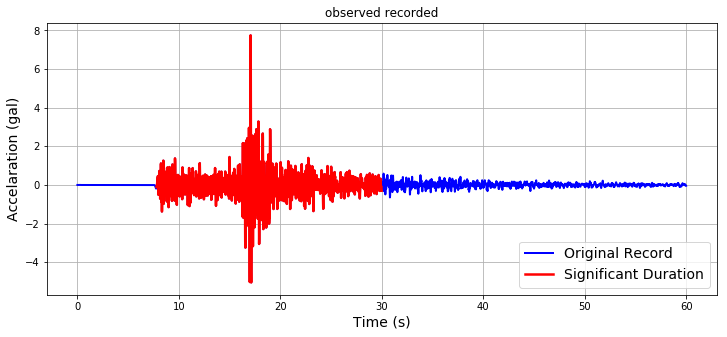

In [143]:
plt.figure(figsize=(12, 5))
plt.plot(time_vector,NS,"b-", linewidth=2.0,label="Original Record")

plt.plot(time_vector2,NS[int(ST/time_step):int(SD/time_step)],"r-", linewidth=2.5,label="Significant Duration")

plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Accelaration (gal)", fontsize=14)
plt.title("observed recorded")
plt.legend(loc=4, fontsize=14)
#_save_image(filename, filetype, dpi)
plt.grid(True)
plt.show()

In [144]:
def get_fourier_spectrum(time_series, time_step):
    n_val = nextpow2(len(time_series))
    fspec = np.fft.fft(time_series, n_val)
    d_f = 1. / (n_val * time_step)
    freq = d_f * np.arange(0., (n_val / 2.0), 1.0)
    return freq, time_step * np.absolute(fspec[:int(n_val / 2.0)])

In [145]:
import konno_ohmachi
SMOOTHING = {"KonnoOhmachi": konno_ohmachi.KonnoOhmachi}
params = {"Function": "KonnoOhmachi","bandwidth": 20.0,"count": 1.0,"normalize": True}
smoother = SMOOTHING[params["Function"]](params)

In [148]:
freq, fft_U = get_fourier_spectrum(UD, time_step)
freq, fft_N = get_fourier_spectrum(NS, time_step)
freq, fft_E = get_fourier_spectrum(EW, time_step)

In [149]:
smooth1 = smoother.apply_smoothing(fft_U , freq)
smooth2 = smoother.apply_smoothing(fft_N, freq)
smooth3 = smoother.apply_smoothing(fft_E, freq)

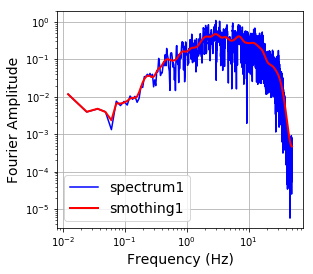

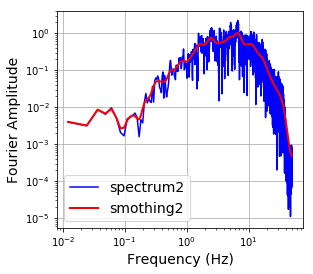

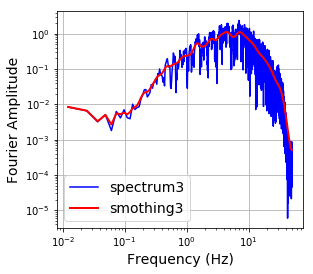

In [182]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.loglog(freq, fft_U, 'b-',label="spectrum1")
plt.loglog(freq,smooth1,"r-", linewidth=2.0,label="smothing1")
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Fourier Amplitude", fontsize=14)
plt.legend(loc=3, fontsize=14)
plt.grid()
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,3,2)
plt.loglog(freq, fft_N, 'b-',label="spectrum2")
plt.loglog(freq,smooth2,"r-", linewidth=2.0,label="smothing2")
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Fourier Amplitude", fontsize=14)
plt.legend(loc=3, fontsize=14)
plt.grid()
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,3,3)
plt.loglog(freq, fft_E, 'b-',label="spectrum3")
plt.loglog(freq,smooth3,"r-", linewidth=2.0,label="smothing3")
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Fourier Amplitude", fontsize=14)
plt.legend(loc=3, fontsize=14)
plt.grid()
plt.show()

In [155]:
def get_husid(acceleration, time_step):
    time_vector = get_time_vector(time_step, len(acceleration))
    husid = np.hstack([0., cumtrapz(acceleration ** 2., time_vector)])
    return husid, time_vector

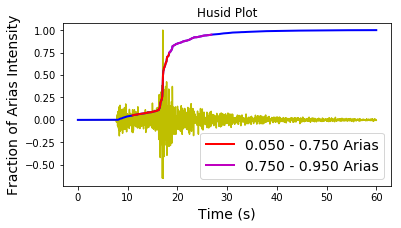

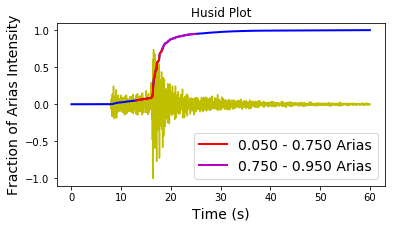

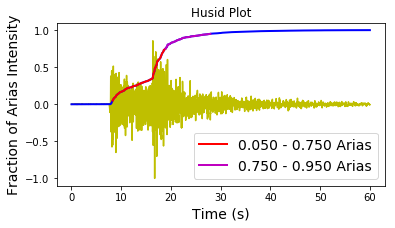

In [178]:
husid1, time_vector = get_husid(NS, time_step)
husid_norm1 = husid1 / husid1[-1]
idx1 = np.where(np.logical_and(husid_norm1 >= 0.05,husid_norm1 <=0.75))[0]
idx2 = np.where(np.logical_and(husid_norm1 >= 0.75,husid_norm1 <=0.95))[0]

husid2, time_vector = get_husid(EW, time_step)
husid_norm2 = husid2 / husid2[-1]
idx3 = np.where(np.logical_and(husid_norm2 >= 0.05,husid_norm2 <=0.75))[0]
idx4 = np.where(np.logical_and(husid_norm2 >= 0.75,husid_norm2 <=0.95))[0]

husid3, time_vector = get_husid(UD, time_step)
husid_norm3 = husid3 / husid3[-1]
idx5 = np.where(np.logical_and(husid_norm3 >= 0.05,husid_norm3 <=0.75))[0]
idx6 = np.where(np.logical_and(husid_norm3 >= 0.75,husid_norm3 <=0.95))[0]


plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
plt.plot(time_vector, NS/np.max(np.fabs(NS)), "y-")
plt.plot(time_vector, husid_norm1, "b-", linewidth=2.0)
plt.plot(time_vector[idx1], husid_norm1[idx1], "r-", linewidth=2.0,label="%5.3f - %5.3f Arias" % (0.05, 0.75))
plt.plot(time_vector[idx2], husid_norm1[idx2], "m-", linewidth=2.0,label="%5.3f - %5.3f Arias" % (0.75,0.95))
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Fraction of Arias Intensity", fontsize=14)
plt.title("Husid Plot")
plt.legend(loc=4, fontsize=14)

plt.figure(figsize=(20,3))
plt.subplot(1,3,2)
plt.plot(time_vector, EW/np.max(np.fabs(EW)), "y-")
plt.plot(time_vector, husid_norm2, "b-", linewidth=2.0)
plt.plot(time_vector[idx3], husid_norm2[idx3], "r-", linewidth=2.0,label="%5.3f - %5.3f Arias" % (0.05, 0.75))
plt.plot(time_vector[idx4], husid_norm2[idx4], "m-", linewidth=2.0,label="%5.3f - %5.3f Arias" % (0.75,0.95))
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Fraction of Arias Intensity", fontsize=14)
plt.title("Husid Plot")
plt.legend(loc=4, fontsize=14)

plt.figure(figsize=(20,3))
plt.subplot(1,3,3)
plt.plot(time_vector, UD/np.max(np.fabs(UD)), "y-")
plt.plot(time_vector, husid_norm3, "b-", linewidth=2.0)
plt.plot(time_vector[idx5], husid_norm3[idx5], "r-", linewidth=2.0,label="%5.3f - %5.3f Arias" % (0.05, 0.75))
plt.plot(time_vector[idx6], husid_norm3[idx6], "m-", linewidth=2.0,label="%5.3f - %5.3f Arias" % (0.75,0.95))
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Fraction of Arias Intensity", fontsize=14)
plt.title("Husid Plot")
plt.legend(loc=4, fontsize=14)

plt.show()

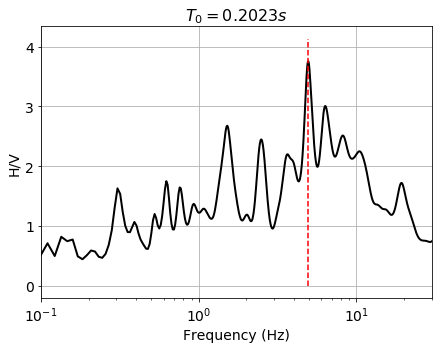

In [179]:
# Setup parameters
params = {"Function": "KonnoOhmachi","bandwidth": 40.0,"count": 1.0,"normalize": True}
# Returns
# 1. Horizontal to Vertical Spectral Ratio
# 2. Frequency
# 3. Maximum H/V
# 4. Period of Maximum H/V
#x_component, x_time_step, y_component, y_time_step, vertical,vertical_time_step, smoothing_params
hvsr, freq, max_hv, t_0 = ims.get_hvsr(NS, time_step, EW, time_step, UD, time_step, params)

plt.figure(figsize=(7,5))

plt.semilogx(freq, hvsr, 'k-', lw=2.0)

t_0_line = np.array([[t_0, 0.0],[t_0, 1.1 * max_hv]])

plt.semilogx(1.0 / t_0_line[:, 0], t_0_line[:, 1], "r--", lw=1.5)


plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("H/V", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(0.1, 30.0)
plt.grid(True)
plt.title(r"$T_0 = %.4f s$" % t_0, fontsize=16)
plt.show()

In [192]:
filepath = 'E:\Notebook\params_py\\data'
filelist = GetFileList(filepath,'.txt')
params = {"Function": "KonnoOhmachi","bandwidth": 40.0,"count": 1.0,"normalize": True}

In [197]:
UD1,NS1,EW1 = getacc(filelist[0])
hvsr1, freq1, max_hv1, t_01 = ims.get_hvsr(NS1, time_step, EW1, time_step, UD1, time_step, params)  

UD2,NS2,EW2 = getacc(filelist[1])
hvsr2, freq2, max_hv2, t_02 = ims.get_hvsr(NS2, time_step, EW2, time_step, UD2, time_step, params)  


UD3,NS3,EW3 = getacc(filelist[2])
hvsr3, freq3, max_hv3, t_03 = ims.get_hvsr(NS3, time_step, EW3, time_step, UD3, time_step, params) 



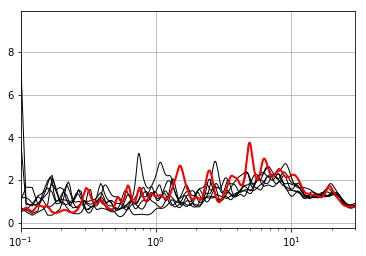

In [206]:
tmp = 0
for lists in filelist:
    UD,NS,EW = getacc(lists)
    hvsr, freq, max_hv, t_0 = ims.get_hvsr(NS, time_step, EW, time_step, UD, time_step, params)
    tmp = hvsr1 + tmp
    plt.semilogx(freq, hvsr, 'k-', lw=1.0)
    
tmp = tmp/len(filelist)
plt.semilogx(freq, tmp, 'r-', lw=2.0)

plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("H/V", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(0.1, 30.0)
plt.grid(True)
plt.title(r"$T_0 = %.4f s$" % t_0, fontsize=16)
plt.show()